<a href="https://colab.research.google.com/github/Munna-Prasad-Gupta/ML/blob/main/ass4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

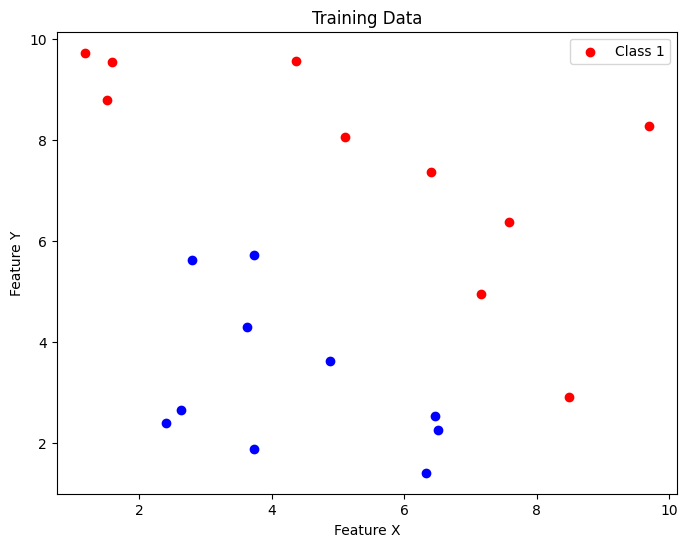

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Task A3: Generate 20 random data points for training
np.random.seed(42)  # For reproducibility
X_train = np.random.uniform(1, 10, (20, 2))
y_train = np.where(X_train[:, 0] + X_train[:, 1] > 10, 1, 0)  # Simple rule for classification

# Plotting the training data
plt.figure(figsize=(8, 6))
for i in range(20):
    if y_train[i] == 0:
        plt.scatter(X_train[i, 0], X_train[i, 1], color='blue', label='Class 0' if i == 0 else "")
    else:
        plt.scatter(X_train[i, 0], X_train[i, 1], color='red', label='Class 1' if i == 0 else "")
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Training Data')
plt.legend()
plt.show()


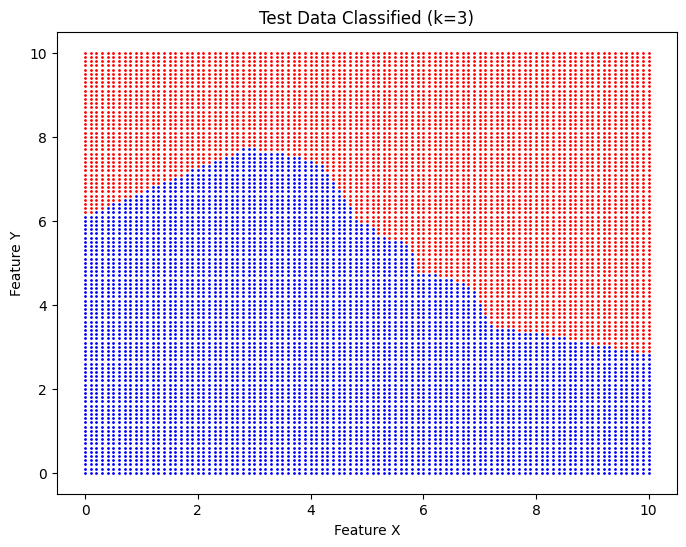

In [3]:
# Task A4: Generate test data and classify using kNN (k=3)
X_test = np.array([[x, y] for x in np.arange(0, 10.1, 0.1) for y in np.arange(0, 10.1, 0.1)])
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)

# Plotting the test data with predictions
plt.figure(figsize=(8, 6))
for i in range(len(X_test)):
    if y_test_pred[i] == 0:
        plt.scatter(X_test[i, 0], X_test[i, 1], color='blue', s=1)
    else:
        plt.scatter(X_test[i, 0], X_test[i, 1], color='red', s=1)
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Test Data Classified (k=3)')
plt.show()


In [ ]:
# Task A5: Repeat classification with different values of k
k_values = [1, 5, 10, 15]

plt.figure(figsize=(12, 10))
for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)

    plt.subplot(2, 2, i)
    for j in range(len(X_test)):
        if y_test_pred[j] == 0:
            plt.scatter(X_test[j, 0], X_test[j, 1], color='blue', s=1)
        else:
            plt.scatter(X_test[j, 0], X_test[j, 1], color='red', s=1)
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'Test Data Classified (k={k})')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Task A7: Hyper-parameter tuning using GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best k value: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validated score: {grid_search.best_score_:.4f}")
